In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [2]:
df=pd.read_csv("D:\\Busniss intellegents\\incomeData.csv")


In [3]:
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

<Axes: >

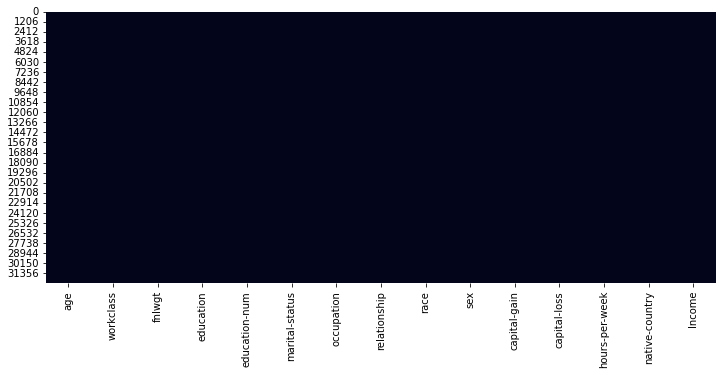

In [7]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)

In [8]:
descriptive_stats = df.describe()

In [9]:
descriptive_stats 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Statistical Analysis
income_stats = df['Income'].describe()
print("Summary Statistics for Income:")
print(income_stats)
print()

Summary Statistics for Income:
count      32561
unique         2
top        <=50K
freq       24720
Name: Income, dtype: object



In [12]:
# Summary statistics for capital gain and loss based on income groups
summary_stats = df.groupby('Income')[['capital-gain', 'capital-loss']].describe()
print("Summary Statistics for Capital Gain and Loss based on Income:")
print(summary_stats)

Summary Statistics for Capital Gain and Loss based on Income:
       capital-gain                                                          \
              count         mean           std  min  25%  50%  75%      max   
Income                                                                        
 <=50K      24720.0   148.752468    963.139307  0.0  0.0  0.0  0.0  41310.0   
 >50K        7841.0  4006.142456  14570.378951  0.0  0.0  0.0  0.0  99999.0   

       capital-loss                                                      
              count        mean         std  min  25%  50%  75%     max  
Income                                                                   
 <=50K      24720.0   53.142921  310.755769  0.0  0.0  0.0  0.0  4356.0  
 >50K        7841.0  195.001530  595.487574  0.0  0.0  0.0  0.0  3683.0  


In [16]:
df.columns = df.columns.str.strip()

In [17]:
df.groupby(['education', 'education-num', df.columns[-1]])[df.columns[-1]].count()

education      education-num  Income
 10th          6               <=50K     871
                               >50K       62
 11th          7               <=50K    1115
                               >50K       60
 12th          8               <=50K     400
                               >50K       33
 1st-4th       2               <=50K     162
                               >50K        6
 5th-6th       3               <=50K     317
                               >50K       16
 7th-8th       4               <=50K     606
                               >50K       40
 9th           5               <=50K     487
                               >50K       27
 Assoc-acdm    12              <=50K     802
                               >50K      265
 Assoc-voc     11              <=50K    1021
                               >50K      361
 Bachelors     13              <=50K    3134
                               >50K     2221
 Doctorate     16              <=50K     107
                  

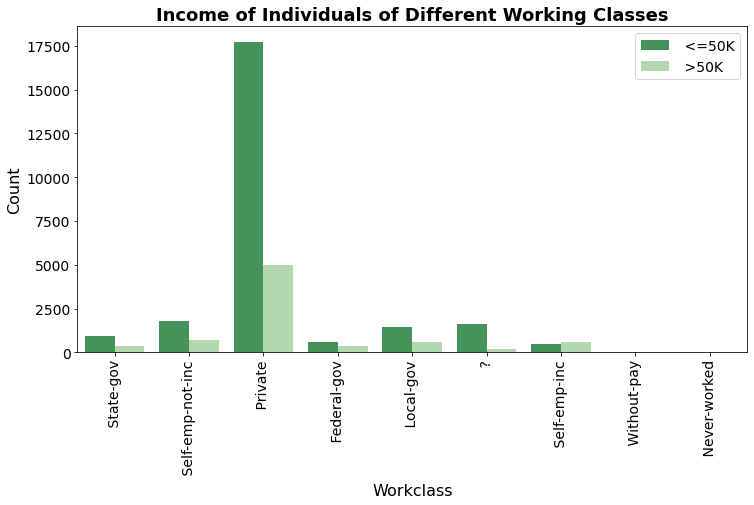

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='Income', palette='Greens_r')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xlabel('Workclass', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful! People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year! There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt. People belonging to the category Without-Pay and Never-Worked hardly

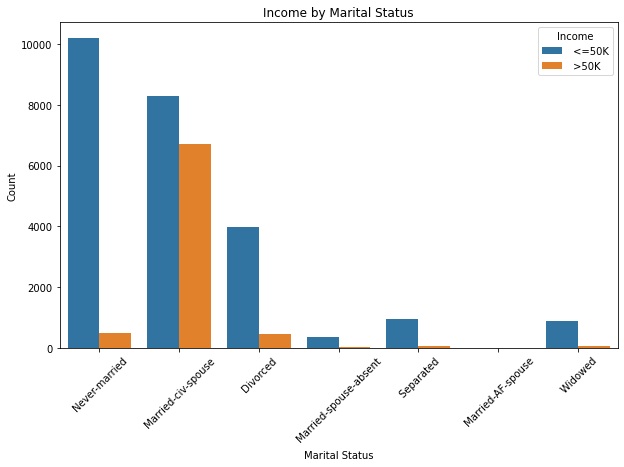

In [19]:
# Bar plot of Income by Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='Income', data=df)
plt.title('Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

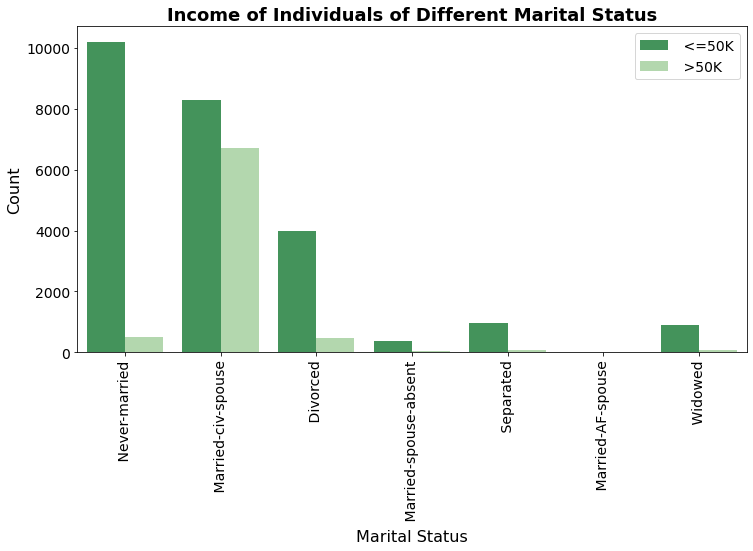

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital-status', hue='Income', palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories. For others, there are less than 25% of the adults earning more than 50K dollars an year.

In [21]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

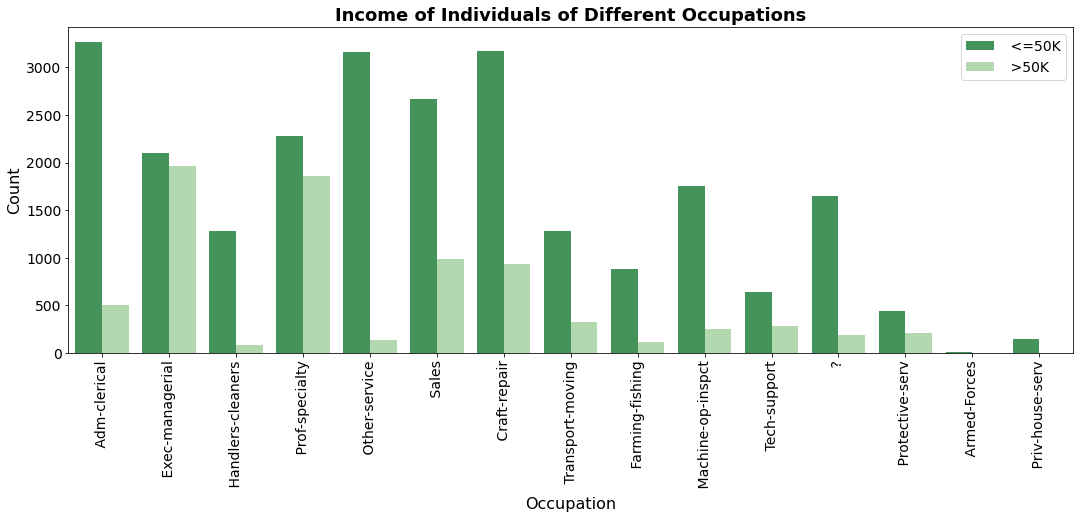

In [23]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='occupation', hue='Income', palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

Exec-managerial role are equally likely to earn more than 50K dollars an year. There's close to 33% probablity for an adult in Prof-specialty to earn more than 50K dollars an year. Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year. Around 25% of the people working in Sales earn more than 50K dollars an year.

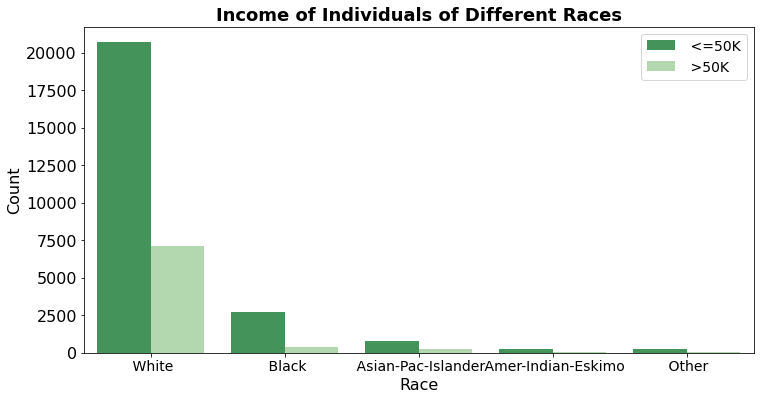

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race', hue='Income', palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xlabel('Race', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.show()

An important point to notice over here is that, except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

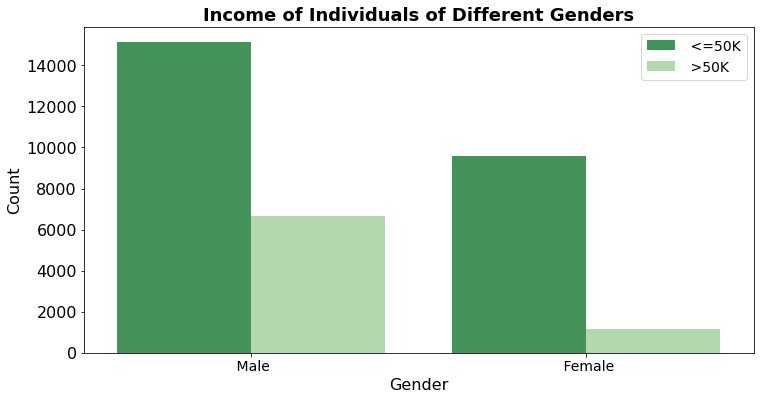

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sex', hue='Income', palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.show()

For Females, there are less than 10% of the  earning more than 50K dollars an year.
In case of Males there are close to 33% of them earning more than 50K dollars an year.

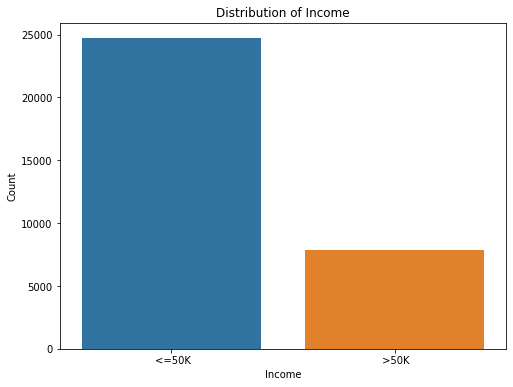

In [27]:
# 1. Distribution of Income
plt.figure(figsize=(8, 6))
sns.countplot(x='Income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

The number of people earning more than 50K dollars an year is one third of the people earning less than it.

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


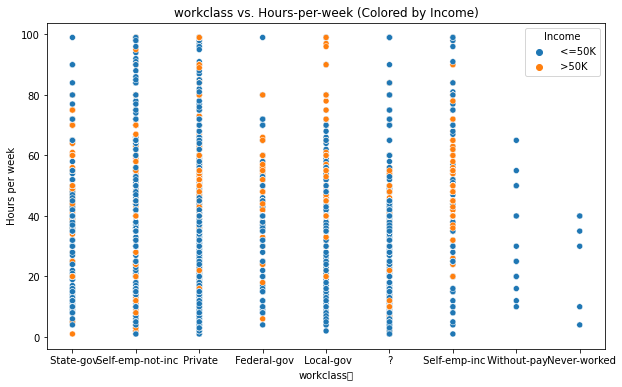

In [28]:
# Scatter plot of Age vs. Hours-per-week colored by Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='workclass', y='hours-per-week', hue='Income', data=df)
plt.title('workclass vs. Hours-per-week (Colored by Income)')
plt.xlabel('workclass	')
plt.ylabel('Hours per week')
plt.legend(title='Income', loc='upper right')
plt.show()

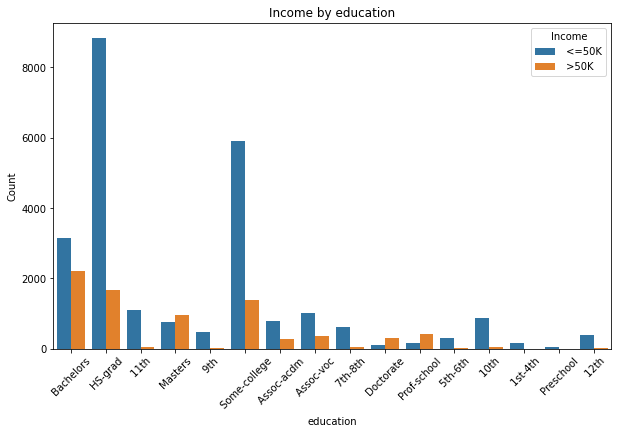

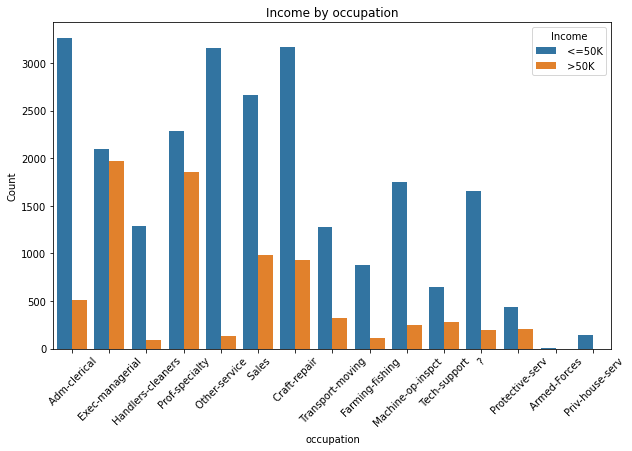

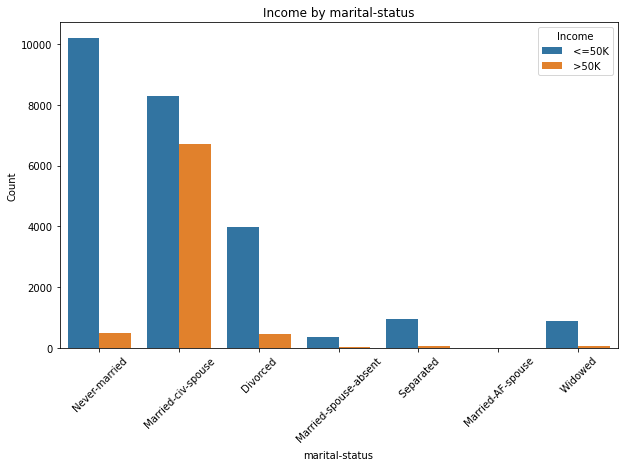

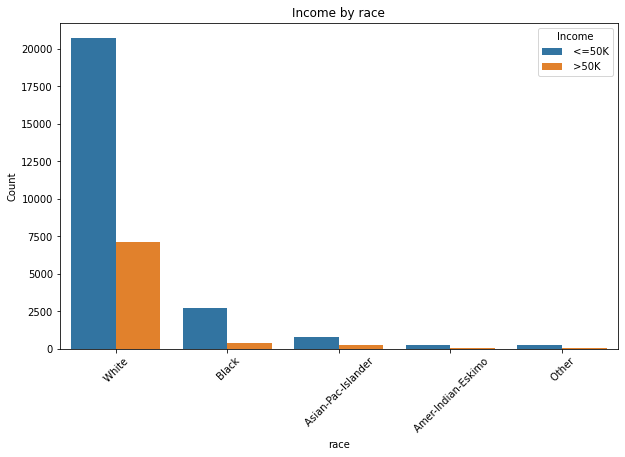

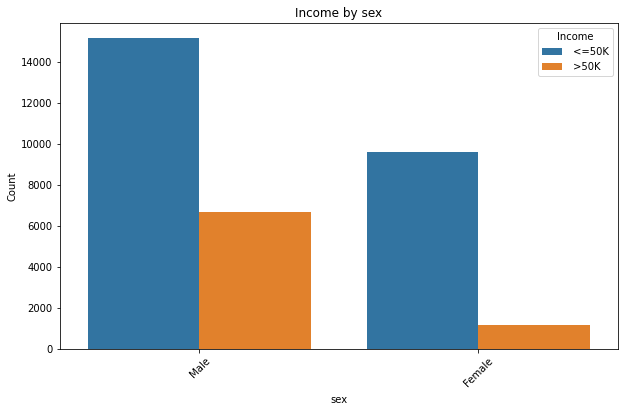

In [29]:
categorical_vars = ['education', 'occupation', 'marital-status', 'race', 'sex']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='Income', data=df)
    plt.title(f'Income by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Income')
    plt.show()
    

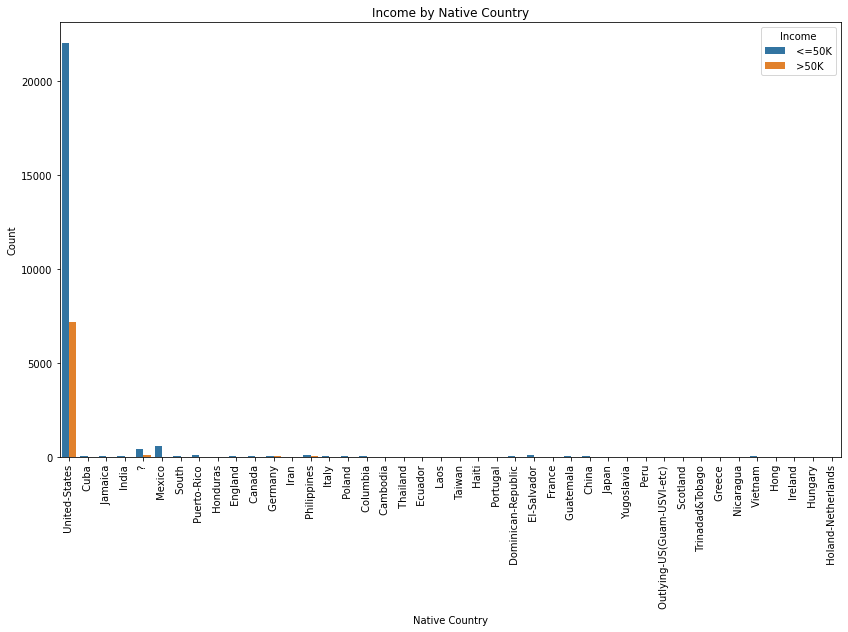

In [30]:
# 4. Income by Native Country
plt.figure(figsize=(14, 8))
sns.countplot(x='native-country', hue='Income', data=df)
plt.title('Income by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()

In [31]:
label_encoder = LabelEncoder()
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [32]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,<=50K
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,>50K
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,<=50K
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,<=50K


In [33]:
#sale numerical features using StandardScaler
scaler = StandardScaler()
numerical_cols = ['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])    

In [34]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,<=50K
1,50,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,<=50K
2,38,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,<=50K
3,53,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,<=50K
4,28,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,0.639741,7,0.746039,2,13,5,4,0,-0.145920,-0.21666,-0.197409,39,<=50K
32557,40,4,-0.335433,11,-0.420060,2,7,0,4,1,-0.145920,-0.21666,-0.035429,39,>50K
32558,58,4,-0.358777,11,-0.420060,6,1,4,4,0,-0.145920,-0.21666,-0.035429,39,<=50K
32559,22,4,0.110960,11,-0.420060,4,1,3,4,1,-0.145920,-0.21666,-1.655225,39,<=50K


In [35]:
#Splitting Data
X = df.drop('Income', axis=1)
y = df['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [37]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_encoded, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Make predictions on the testing set
y_pred = logistic_regression_model.predict(X_test_encoded)

In [39]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8265008444649163
